 # How durable is LeBron James?

 Is this post we look at season data to compare the playing time of LeBron to other players.

 Data comes from [basketball-reference.com](https://www.basketball-reference.com)

 ## Data preparation
 We collect the data using `pandas.read_html` before transforming and cleaning.

 First import some stuff:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme()

players_dfs = {}

In [2]:
players = {
    "jamesle01": "James",
    "bryanko01": "Bryant",
    "jordami01": "Jordan",
    "abdulka01": "Jabar",
    "chambwi01": "Chamberlain",
    "malonka01": "Malone",
    "duncati01": "Duncan",
    "curryst01": "Curry",
    "paulch01": "Paul",
    "duranke01": "Durrant",
    "hardeja01": "Harden",
    "howardw01": "Howard",
    "westbru01": "Westbrook",
    "rosede01": "Rose",
    "leonaka01": "Leonard",
    "cartevi01": "Carter",
    "antetgi01": "Antetokounmpo",
    "anthoca01": "Anthony",
    "embiijo01": "Embiid",
    "willizi01": "Williamson",
}

for player in players:
    if player in players_dfs:
        print(f"{players[player]} already added")
        continue
    print(f"{players[player]} fetching...")
    # df = pd.read_html(f"https://widgets.sports-reference.com/wg.fcgi?css=1&site=bbr&url=%2Fplayers%2F{player[0]}%2F{player}.html&div=div_per_game", flavor="bs4")[0]
    df = pd.read_html(
        f"https://widgets.sports-reference.com/wg.fcgi?css=1&site=bbr&url=%2Fplayers%2F{player[0]}%2F{player}.html&div=div_totals",
        flavor="bs4",
    )[0]

    # filter rows/columns and type
    df = df[["Season", "Age", "G", "MP"]]
    df = df.dropna(axis=1, thresh=1)
    df = df.loc[~df.isna().any(axis=1)]
    df["Season"] = pd.to_numeric(df["Season"].apply(lambda x: x[:4]))

    # keep first duplicate for changing team
    df = df.loc[~df["Age"].duplicated()]

    # reindex Age to fill gaps
    age_range = np.arange(df["Age"].min(), df["Age"].max() + 1)
    df = df.set_index("Age").reindex(age_range).reset_index()
    df["Season"] = df["Season"].interpolate()
    df = df.mask(df.isna(), 0)

    # seasonNo as number of seasons played
    df["SeasonNo"] = df["Age"] - df["Age"].min() + 1
    df["Player"] = players[player]
    players_dfs[player] = df[["Season", "G", "MP", "Age", "SeasonNo", "Player"]]

df_players = pd.concat(players_dfs, axis=0)

# Pivot table aligned to career start
plot_col = "MP"
df_season_no_plot = df_players[["SeasonNo", "Player", plot_col]].pivot(
    index="Player", columns="SeasonNo", values=plot_col
)

James fetching...
Bryant fetching...
Jordan fetching...
Jabar fetching...
Chamberlain fetching...
Malone fetching...
Duncan fetching...
Curry fetching...
Paul fetching...
Durrant fetching...
Harden fetching...
Howard fetching...
Westbrook fetching...
Rose fetching...
Leonard fetching...
Carter fetching...
Antetokounmpo fetching...
Anthony fetching...
Embiid fetching...
Williamson fetching...


 We now have a dataframe of players and the number of minutes played in each season since they started in the NBA:

In [3]:
df_season_no_plot.head().iloc[:, :5]

SeasonNo,1.0,2.0,3.0,4.0,5.0
Player,,,,,
Antetokounmpo,1897.0,2541.0,2823.0,2845.0,2756.0
Anthony,2995.0,2608.0,2941.0,2486.0,2806.0
Bryant,1103.0,2056.0,1896.0,2524.0,2783.0
Carter,1760.0,3126.0,2979.0,2385.0,1471.0
Chamberlain,3338.0,3773.0,3882.0,3806.0,3689.0


 # Analysis
 Let's compare against other all time greats. LeBron is right up there in terms of minutes played.
 It's only within the last 1/2 seasons that his minutes drop compared to Jabar and Malone.
 Interesting Jordan is an exception due to his two retirement periods.

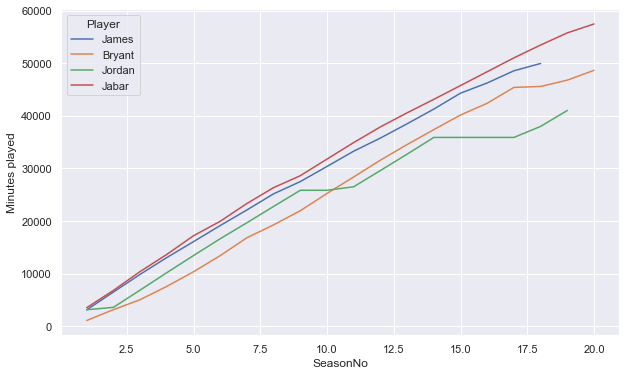

In [4]:
df_season_no_plot.loc[["James", "Bryant", "Jordan", "Jabar"], :].cumsum(
    axis=1
).transpose().plot(grid=True, ylabel="Minutes played", figsize=(10, 6))
plt.show()

 Comparing against superstars form the last couple decades it is apparent how LeBron has managed to avoid any significant injuries affecting his game time.

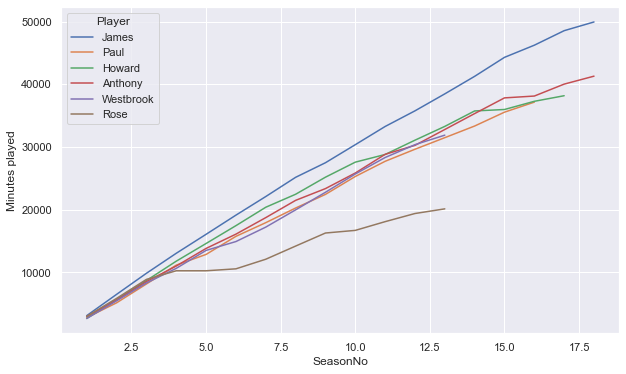

In [5]:
df_season_no_plot.loc[
    ["James", "Paul", "Howard", "Anthony", "Westbrook", "Rose"], :
].cumsum(axis=1).transpose().plot(grid=True, ylabel="Minutes played", figsize=(10, 6))
plt.show()

 Comparing against newer/upcoming superstars:
 For the same number of seasons Kawhi Leondard has played about 50% of the mintues of LeBron James, due to resting during the regular season and injury issues.
 Likewise, Durrant has played about 20% less minutes than LeBron.
 Durrant is the closest to keeping up with LeBron, everyone else is playing less...
 Maybe that means they will keep playing longer?
 I doubt it, mostly this seems down to injury troubles, rather than resting.
 This suggests that no-one in recent years has really been able to stay as healthy as efficient as LeBron James.

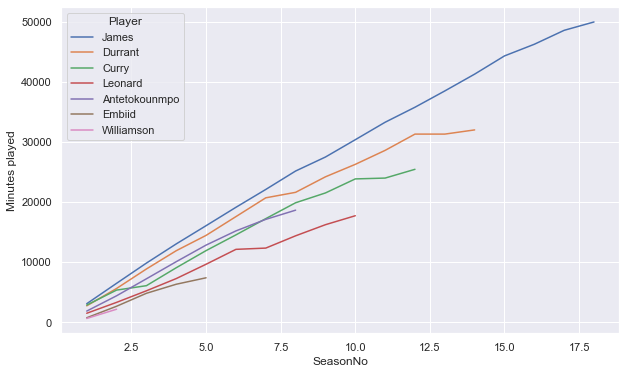

In [6]:
df_season_no_plot.loc[
    [
        "James",
        "Durrant",
        "Curry",
        "Leonard",
        "Antetokounmpo",
        "Embiid",
        "Williamson",
    ],
    :,
].cumsum(axis=1).transpose().plot(grid=True, ylabel="Minutes played", figsize=(10, 6))
plt.show()

 Just for fun here's load of players on one unreadable plot:

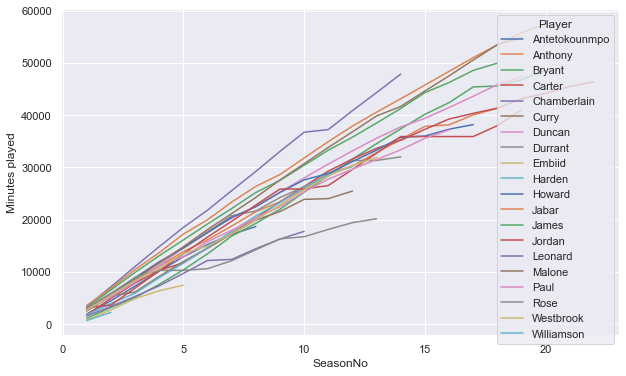

In [7]:
df_season_no_plot.cumsum(axis=1).transpose().plot(
    grid=True, ylabel="Minutes played", figsize=(10, 6)
)
plt.show()

 Or as a heat map.
 We can see players like Vince Carter having a very long career but his minutes slowing down towards the later half.
 It's evident that some modern days superstars are not playing any seasons at max capacity, for example Leonard and Emiid.

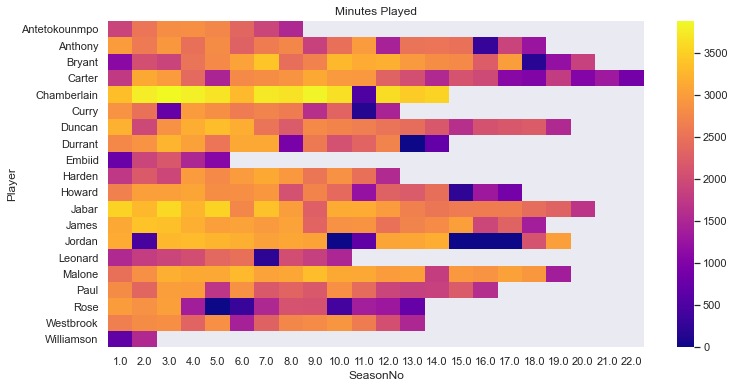

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.heatmap(df_season_no_plot, cmap="plasma", ax=ax)
ax.set_title("Minutes Played")
plt.show()